# Seaborn
- matplotlib을 기반으로 다양한 테마와 그래프를 제공하는 파이썬 시각화 패키지.-
- http://seaborn.pydata.org/
    - 공식 사이트의 [gallary](http://seaborn.pydata.org/examples/index.html)에 제공하는 다양한 그래프와 예제를 확인 할 수 있다.
- 설치: 아나콘다에는 포함되있다.
```
pip install seaborn
conda install seaborn
```
    

# warning을 없애준다.
import warning  
warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#tips = pd.read_csv('data/tips.csv')
tips = sns.load_dataset('tips')

In [3]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## rugplot, kdeplot, distplot
- 1차원 연속형 값들의 분포를 시각화 하는 그래프

### rugplot 
- 각 데이터들의 위치를 보여준다.

In [6]:
tips['total_bill']

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

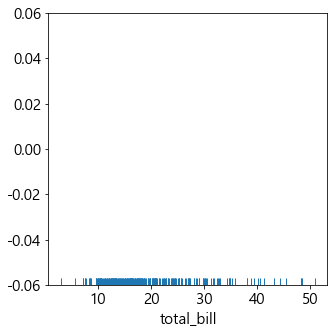

In [12]:
plt.figure(figsize=(5,5))
sns.rugplot(x=tips['total_bill'])
plt.show()

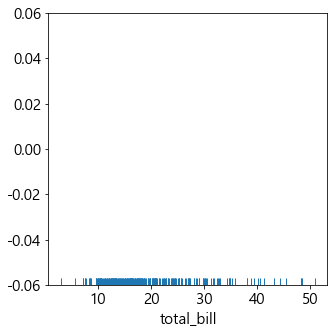

In [15]:
plt.figure(figsize=(5,5))
sns.rugplot("total_bill", data=tips)
plt.show()
# 컬럼명: 문자열
# data : DataFrame객체

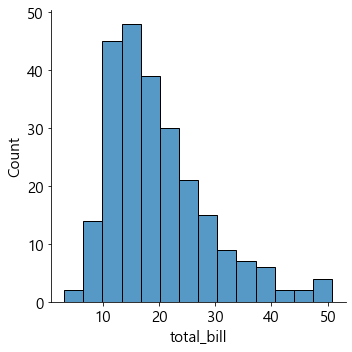

In [55]:
sns.displot(tips['total_bill'])

### kdeplot
- 히스토그램을 부드러운 곡선 형태로 표현한다. 
- KDE(Kernel Density Estimation) : 확률밀도추정

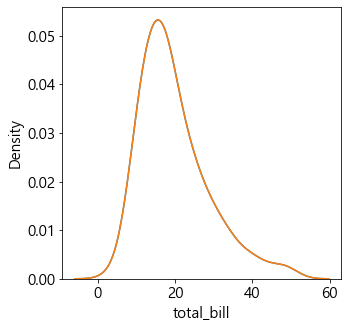

In [16]:
plt.figure(figsize=(5,5))
sns.kdeplot(x=tips['total_bill'])
sns.kdeplot("total_bill", data=tips)
plt.show()


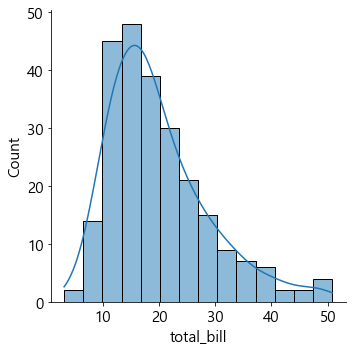

In [37]:
sns.displot(tips['total_bill'],
             kde=True,
             rug=False)

### distplot
- 히스토그램에 kdeplot, rugplot 한번에 그린다.
    - kdeplot은 default로 나오고 rugplot은 default로 안나온다.

C:\Users\mein0\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mein0\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


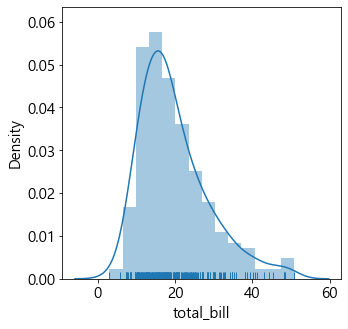

In [43]:
plt.figure(figsize=(5,5))
#sns.distplot(tips['total_bill'])
sns.distplot(tips['total_bill'],
             hist=True,
             kde=True,
             rug=True)
plt.show()


In [ ]:
tips['smoker']

## boxplot(), violinplot(), swamplot()
- 연속형 데이터(양적데이터)들의 분포를 확인하는 그래프를 그린다.
- 범주별로 연속형 데이터의 분포를 비교할 수 있다.

### boxplot

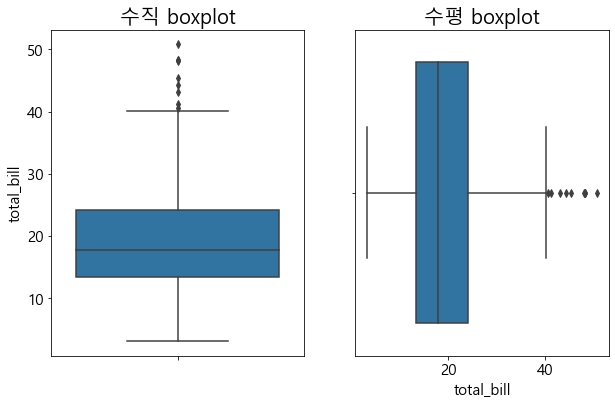

In [40]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(y=tips['total_bill'])
plt.title('수직 boxplot')

plt.subplot(1,2,2)
sns.boxplot(x=tips['total_bill'])
plt.title('수평 boxplot')
plt.show()

In [51]:
#tips.groupby('smoker')['total_bill']
#seaborn에서 자동으로 
yes = tips[tips['smoker']=='Yes']['total_bill']
no = tips[tips['smoker']=='No']['total_bill']
yes, no

(56     38.01
 58     11.24
 60     20.29
 61     13.81
 62     11.02
        ...  
 234    15.53
 236    12.60
 237    32.83
 240    27.18
 241    22.67
 Name: total_bill, Length: 93, dtype: float64,
 0      16.99
 1      10.34
 2      21.01
 3      23.68
 4      24.59
        ...  
 235    10.07
 238    35.83
 239    29.03
 242    17.82
 243    18.78
 Name: total_bill, Length: 151, dtype: float64)

<AxesSubplot:xlabel='total_bill', ylabel='smoker'>

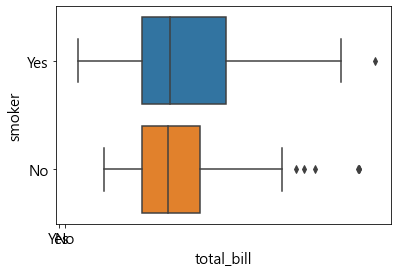

In [52]:

#x(y)축: 분포를 보려는 연속형 값의 컬럼, y(x)축: 그룹을 나누려는 범주형 컬럼
sns.boxplot(y='total_bill',x='smoker',data=tips)



<AxesSubplot:xlabel='smoker', ylabel='total_bill'>

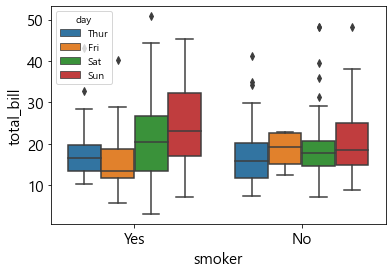

In [54]:
#x(y)축: 분포를 보려는 연속형 값의 컬럼, y(x)축: 그룹을 나누려는 범주형 컬럼

# hue
sns.boxplot(y='total_bill', x='smoker', hue='day', data=tips)


### violin plot
- boxplot 위에 분포 밀도(kernel density)를 좌우 대칭으로 덮어쓰는 방식으로 데이터의 분포를 표현하므로 boxplot 보다 좀더 정확한 데이터의 분포를 볼 수 있다.
- 매개변수는 boxplot과 동일

<AxesSubplot:ylabel='tip'>

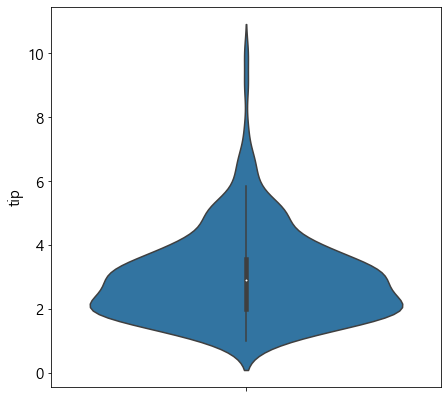

In [4]:
plt.figure(figsize=(7,7))
sns.violinplot(y='tip',data=tips)

<AxesSubplot:xlabel='day', ylabel='tip'>

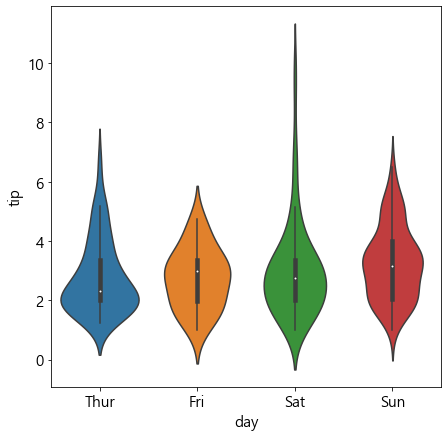

In [5]:
plt.figure(figsize=(7,7))
sns.violinplot(y='tip',x='day',data=tips) #날짜별.

<AxesSubplot:xlabel='day', ylabel='tip'>

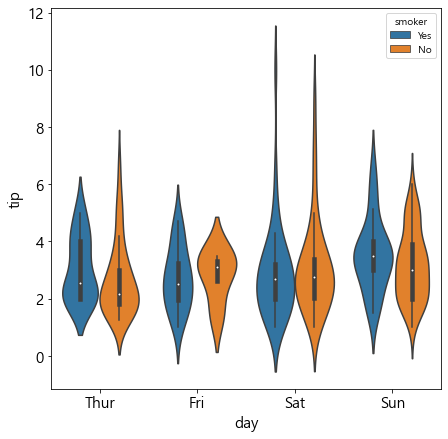

In [6]:
plt.figure(figsize=(7,7))
sns.violinplot(y='tip',x='day',hue='smoker',data=tips) # 요일-흡연여부

### swarmplot
- 실제 값들을 점으로 찍어 준다. 
- boxplot이나 violin plot의 보안해주는 역할로 쓰인다.
- swarmplot은 가운데 분류를 기준으로 분포시키는데 실제 값이 있는 위치에 점을 찍으므로 좀더 정확하게 값이 어디에 있는지 알 수 있다.

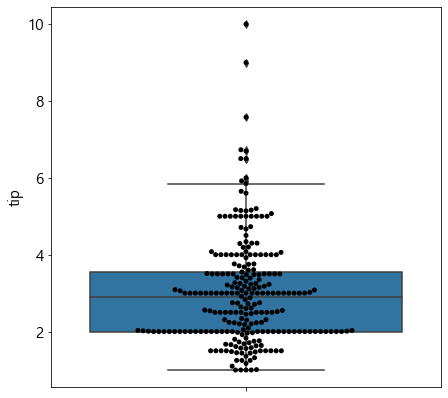

In [18]:
plt.figure(figsize=(7,7))
sns.boxplot(y='tip', data=tips)
sns.swarmplot(y='tip', data=tips, color='k')
#sns.boxplot(y='tip',x='day',hue='smoker',data=tips)
#sns.swarmplot(y='tip',x='day',hue='smoker',data=tips)

plt.show()

### countplot() 
- 막대그래프(bar plot)을 그리는 함수
- 범주형 변수의 고유값의 개수를 표시
- matplotlib의 bar()

<AxesSubplot:>

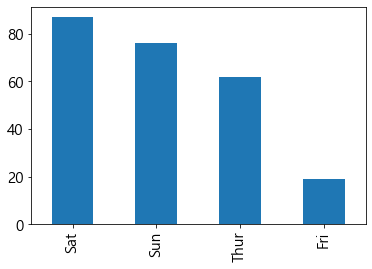

In [22]:
tips['day'].value_counts().plot(kind='bar')

In [93]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


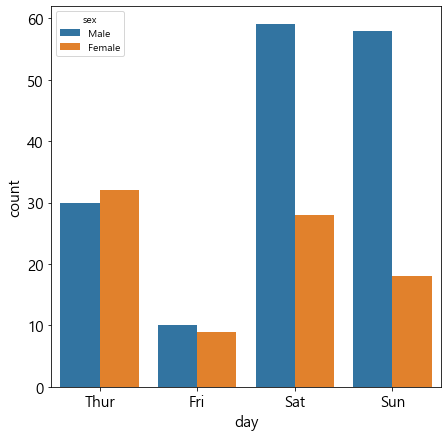

In [27]:
plt.figure(figsize=(7,7))
# 범주형 컬럼을 지정하면 고윳값별로 개수를 막대그래프로 그려준다.
sns.countplot(x='day', hue='sex',data=tips)
plt.show()

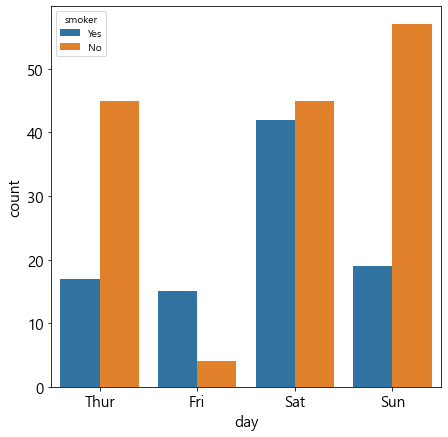

In [31]:
# 요일별-흡연여부별로
plt.figure(figsize=(7,7))
sns.countplot(x='day',hue='smoker',data=tips)
plt.show()

## scatterplot, lmplot, jointplot, pairplot
- 산점도를 그린다.

### scatterplot

팔레트 - https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

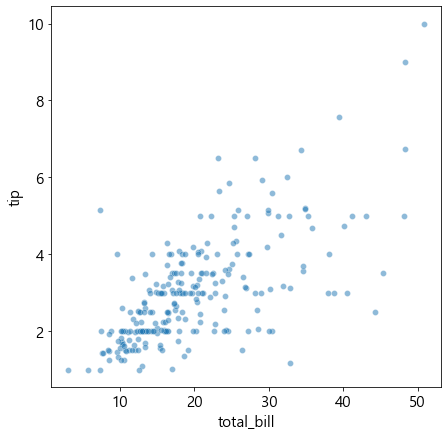

In [38]:
plt.figure(figsize=(7,7))
sns.scatterplot(x='total_bill',y='tip', data=tips, alpha=0.5)
plt.show()

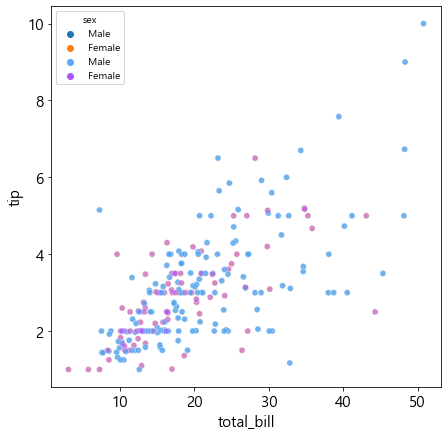

In [40]:
# 성별로 나눠서 확인
plt.figure(figsize=(7,7))
sns.scatterplot(x='total_bill',y='tip',hue='sex', data=tips, alpha=0.5)
# colormap지정: matplot/pandas = cmap, seaborn = palette
sns.scatterplot(x='total_bill',y='tip',hue='sex', data=tips, alpha=0.5, palette='cool')
plt.show()

### lmplot()
- 선형회귀 적합선을 포함한 산점도를 그린다.
- linear model

In [ ]:
# 성별로 나눠서 확인

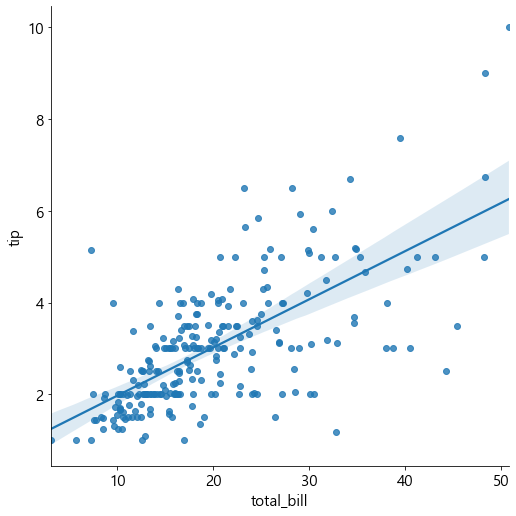

In [46]:
# 성별로 나눠서 확인
sns.lmplot(x='total_bill',y='tip', data=tips, height=7)

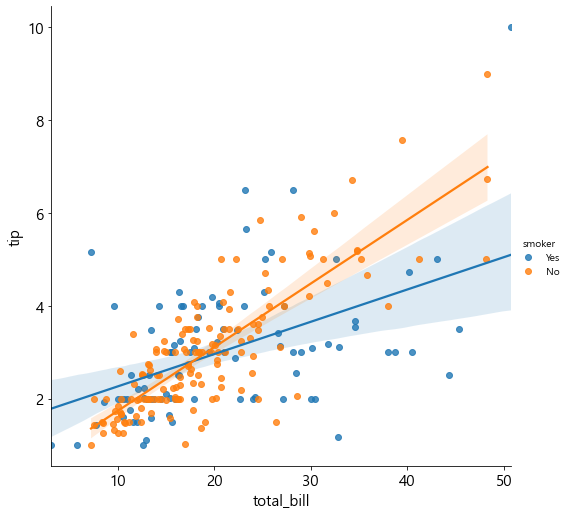

In [53]:
sns.lmplot(x='total_bill',y='tip',hue='smoker', data=tips, height=7)

### jointplot()
- scatter plot 과 각 변수의 히스토그램을 같이 그린다.
- pandas **DataFrame**만 사용할 수 있다.
- DataFrame

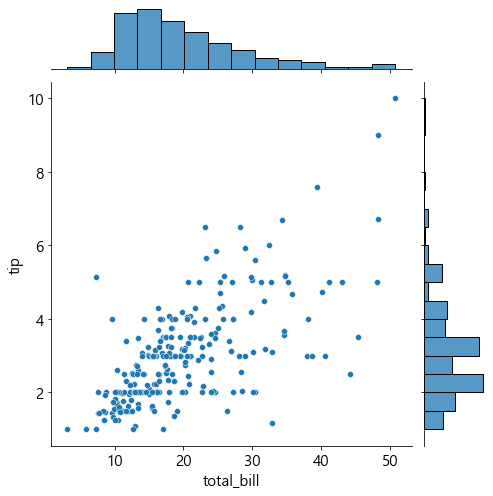

In [60]:
sns.jointplot(x='total_bill',y='tip', data=tips, height=7)
plt.show()

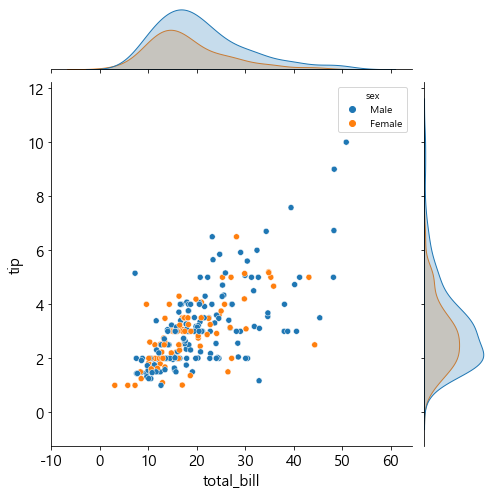

In [61]:
sns.jointplot(x='total_bill',y='tip',hue='sex', data=tips, height=7)
plt.show()

### paireplot
- 다변수(다차원) 데이터들 간의 산점도를 보여준다. 
- 데이터프레임을 인수로 받아 그리드(grid) 형태로 각 변수간의 산점도를 그린다. 같은 변수가 만나는 대각선 영역에는 해당 데이터의 히스토그램을 그린다.

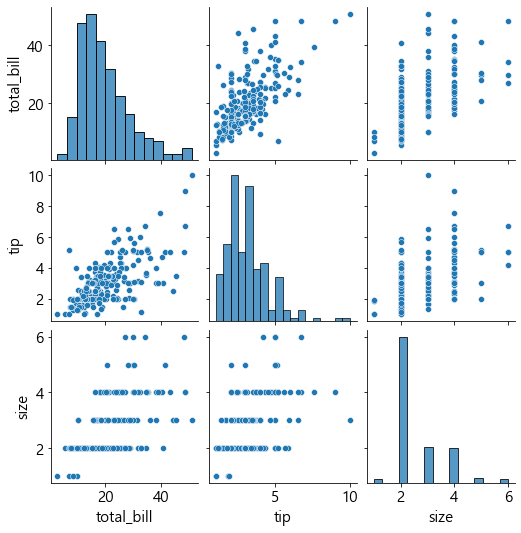

In [73]:
sns.pairplot(data=tips)
plt.show()

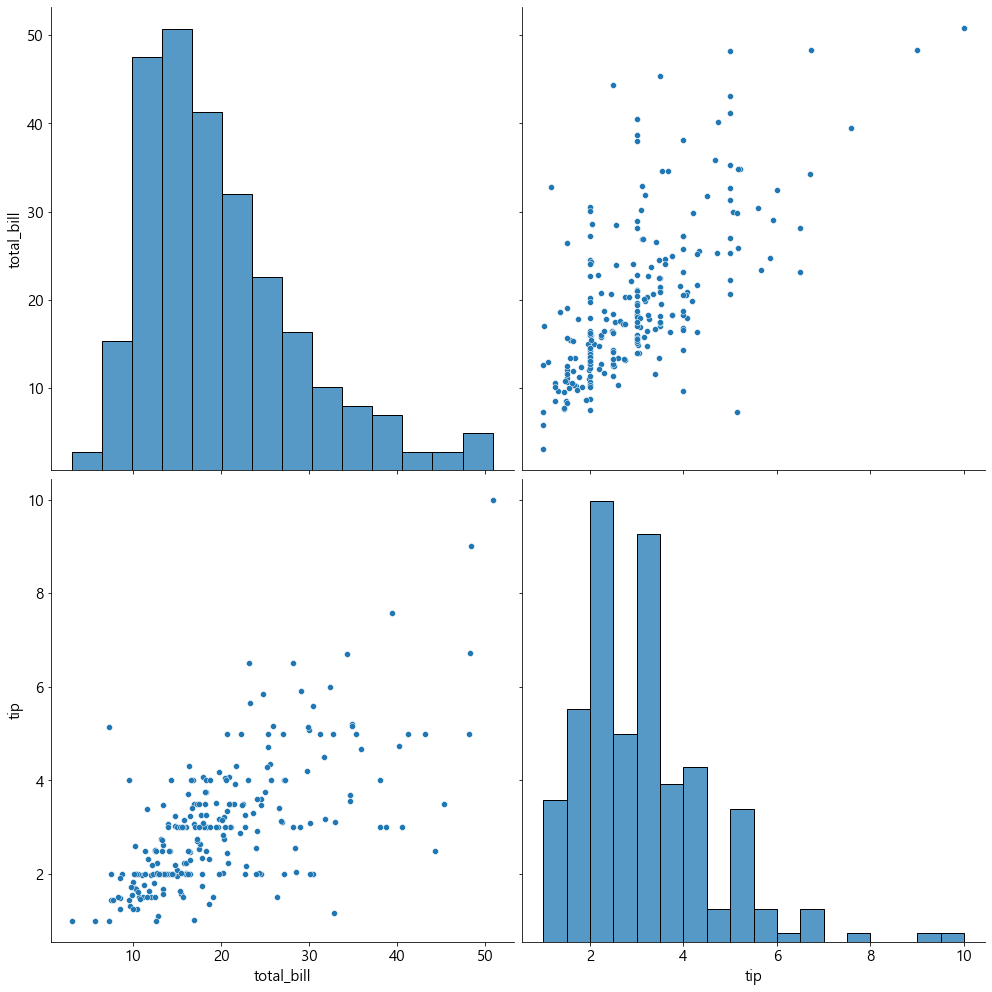

In [71]:
sns.pairplot(data=tips[['total_bill','tip']], height=7)
plt.show()

### heatmap()
- 값들에 비례해서 색깔을 다르게 해 2차원 자료로 시각화

<AxesSubplot:>

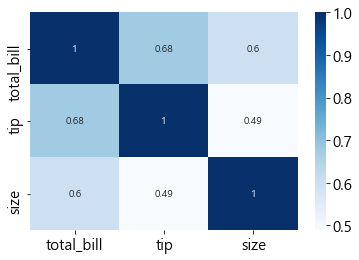

In [82]:
sns.heatmap(tips.corr(), annot=True, cmap='Blues')

### lineplot
- 선그래프
- 시간의 흐름에 따른 값의 변화를 보여주는데 유용하다. (시계열 데이터)

In [85]:
index = pd.date_range('2021/1/1',freq='D', periods=10)
value = np.random.randint(1,100, size=(10,3))
df = pd.DataFrame(value, index, columns= list('ABC'))
df.head()

,A,B,C
2021-01-01,45,93,7
2021-01-02,65,60,50
2021-01-03,11,38,81
2021-01-04,38,68,7
2021-01-05,38,80,49


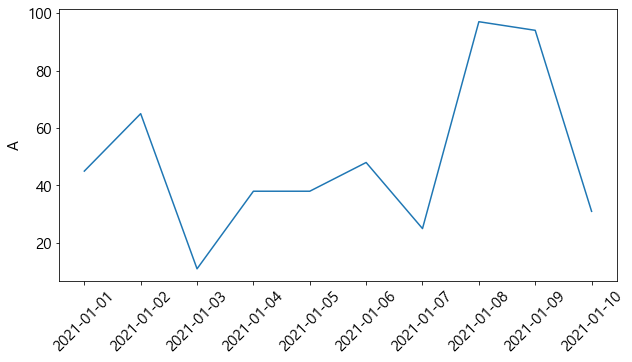

In [92]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df.index,y='A',data=df)
plt.xticks(df.index,rotation=45)
plt.show()